### IFT 870 - Forage de donnéesTP#4 : Fonctions descriptives

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
Data=pd.read_csv(r"C:\Users\dell\Downloads\TP4_data.csv")
Data

,id,sequence
0,AAIY01303410.1/717-923,CCAACGUGGAUACUCCCGGGAGGUCACUCUCCCCGGGCUCUGUCCA...
1,CP000140.1/4143906-4143709,UACCUUUGCAUCCGAAUUGGUUCCGUACGCUCGUUCGGGCAUACGG...
2,URS0000D6BCE7_12908/1-215,GCGUAACGCGCUAUGGCUUAAACGGCUGCCCCAAAGCUGCCAAAGG...
3,X71081.1/4425-4646,CCAAUGUGGAUAUCCUUAGAGGUCUCUCUUGGGCUCUGUCCAGGUG...
4,AACY020770731.1/455-512,UUUCGUUCACCCUCAAUUGAGGGCGCAGUUCGAGUCAUACCAUGGA...
...,...,...
895,URS0000D6890F_1069618/1-62,CAUCUAUAGUUUCAGACAUGGAAUCGCCGAAAACGUCGGCGGUAAA...
896,ACLT01000067.1/45633-45455,AAUAACUGAUUGACUGAAAGUAGGAAUUAAAGCCGUCAAGUUGAGC...
897,URS0000D6BC2B_12908/1-161,UCCGUCAGCUAAUGGCAAUUAGACUGCUGAACUUAAACUGCAUAAG...
898,URS0000D6B588_12908/1-186,GCGAGAAUGUCUACACACCACGGUGGUAGGCAGAGUGUAUUUGUAA...


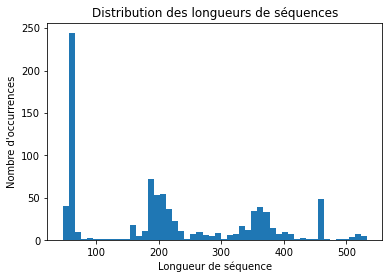

In [9]:
plt.hist(Data['sequence'].apply(len), bins=50)
plt.title('Distribution des longueurs de séquences')
plt.xlabel('Longueur de séquence')
plt.ylabel('Nombre d\'occurrences')
plt.show()

In [10]:
df=Data.copy()
# On définit les intervalles de longueur des séquences
bins = [0, 100, 200, 300, 400, 500, 1000, 1500, 2000, float('inf')]

# On ajoute une colonne pour la longueur de la séquence
df['length'] = df['sequence'].apply(len)

# On ajoute une colonne pour le groupe de longueur
df['group'] = pd.cut(df['length'], bins=bins, labels=False)

# On affiche le nouveau DataFrame
df

,id,sequence,length,group
0,AAIY01303410.1/717-923,CCAACGUGGAUACUCCCGGGAGGUCACUCUCCCCGGGCUCUGUCCA...,207,2
1,CP000140.1/4143906-4143709,UACCUUUGCAUCCGAAUUGGUUCCGUACGCUCGUUCGGGCAUACGG...,198,1
2,URS0000D6BCE7_12908/1-215,GCGUAACGCGCUAUGGCUUAAACGGCUGCCCCAAAGCUGCCAAAGG...,215,2
3,X71081.1/4425-4646,CCAAUGUGGAUAUCCUUAGAGGUCUCUCUUGGGCUCUGUCCAGGUG...,222,2
4,AACY020770731.1/455-512,UUUCGUUCACCCUCAAUUGAGGGCGCAGUUCGAGUCAUACCAUGGA...,58,0
...,...,...,...,...
895,URS0000D6890F_1069618/1-62,CAUCUAUAGUUUCAGACAUGGAAUCGCCGAAAACGUCGGCGGUAAA...,62,0
896,ACLT01000067.1/45633-45455,AAUAACUGAUUGACUGAAAGUAGGAAUUAAAGCCGUCAAGUUGAGC...,179,1
897,URS0000D6BC2B_12908/1-161,UCCGUCAGCUAAUGGCAAUUAGACUGCUGAACUUAAACUGCAUAAG...,161,1
898,URS0000D6B588_12908/1-186,GCGAGAAUGUCUACACACCACGGUGGUAGGCAGAGUGUAUUUGUAA...,186,1


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# On parcourt chaque groupe de longueur
for i in range(len(bins)-1):
    # On sélectionne les séquences dans ce groupe de longueur
    group_df = df[(df['length'] > bins[i]) & (df['length'] <= bins[i+1])]
    sequences = group_df['sequence'].tolist()

    # On génère une représentation vectorielle des séquences basée sur les 2-mer, 3-mer et 4-mer
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,4))
    X = vectorizer.fit_transform(sequences)

    # On affiche les noms des k-mers (facultatif)
    print(vectorizer.get_feature_names())

    # On affiche la matrice de fréquence des k-mers
    print(X.toarray())

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa', 'aaa', 'aaaa', 'aaac', 'aaag', 'aaau', 'aac', 'aaca', 'aacc', 'aacg', 'aacu', 'aag', 'aaga', 'aagc', 'aagg', 'aagu', 'aau', 'aaua', 'aauc', 'aaug', 'aauu', 'ac', 'aca', 'acaa', 'acac', 'acag', 'acau', 'acc', 'acca', 'accc', 'accg', 'accu', 'acg', 'acga', 'acgc', 'acgg', 'acgu', 'acu', 'acua', 'acuc', 'acug', 'acuu', 'ag', 'aga', 'agaa', 'agac', 'agag', 'agau', 'agc', 'agca', 'agcc', 'agcg', 'agcu', 'agg', 'agga', 'aggc', 'aggg', 'aggu', 'agu', 'agua', 'aguc', 'agug', 'aguu', 'au', 'aua', 'auaa', 'auac', 'auag', 'auau', 'auc', 'auca', 'aucc', 'aucg', 'aucu', 'aug', 'auga', 'augc', 'augg', 'augu', 'auu', 'auua', 'auuc', 'auug', 'auuu', 'ca', 'caa', 'caaa', 'caac', 'caag', 'caau', 'cac', 'caca', 'cacc', 'cacg', 'cacu', 'cag', 'caga', 'cagc', 'cagg', 'cagu', 'cau', 'caua', 'cauc', 'caug', 'cauu', 'cc', 'cca', 'ccaa', 'ccac', 'ccag', 'ccau', 'ccc', 'ccca', 'cccc', 'cccg', 'cccu', 'ccg', 'ccga', 'ccgc', 'ccgg', 'ccgu', 'ccu', 'ccua', 'ccuc', 'ccug', 'ccuu', 'cg', 'cga', 'cgaa', 'cgac'

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [12]:

# On parcourt chaque groupe de longueur
for i in range(len(bins)-1):
    # Sélectionner les séquences dans ce groupe de longueur
    group_df = df[(df['length'] > bins[i]) & (df['length'] <= bins[i+1])]
    sequences = group_df['sequence'].tolist()

    # On génère une représentation vectorielle des séquences basée sur les 2-mer, 3-mer et 4-mer
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,4))
    X = vectorizer.fit_transform(sequences)

    # On calcule le score de chaque motif
    motif_scores = X.sum(axis=0) / X.shape[0]

    # On supprime les motifs non fréquents
    frequent_motifs = [motif for motif, score in zip(vectorizer.get_feature_names(), motif_scores.tolist()[0]) if score >= 1/3]
    X = X[:, [i for i, motif in enumerate(vectorizer.get_feature_names()) if motif in frequent_motifs]]

    # On affiche les noms des motifs fréquents
    print(frequent_motifs)

    # On affiche la matrice de données avec les motifs fréquents uniquement
    print(X.toarray())

['aa', 'aaa', 'aaaa', 'aaau', 'aac', 'aacc', 'aag', 'aagc', 'aau', 'aaug', 'aauu', 'ac', 'aca', 'acau', 'acc', 'acg', 'acgg', 'acu', 'ag', 'aga', 'agc', 'agca', 'agcg', 'agg', 'agu', 'agua', 'aguu', 'au', 'aua', 'auc', 'aug', 'augc', 'augu', 'auu', 'auug', 'ca', 'caa', 'caaa', 'cac', 'cag', 'cagu', 'cau', 'caug', 'cc', 'cca', 'ccc', 'ccg', 'ccu', 'ccuc', 'cg', 'cga', 'cgc', 'cgg', 'cggc', 'cggg', 'cgu', 'cu', 'cua', 'cuaa', 'cuc', 'cucu', 'cug', 'cuu', 'ga', 'gaa', 'gac', 'gag', 'gagu', 'gau', 'gauu', 'gc', 'gca', 'gcaa', 'gcc', 'gccg', 'gcg', 'gcgg', 'gcu', 'gg', 'gga', 'ggaa', 'ggc', 'ggcg', 'ggg', 'ggu', 'gu', 'gua', 'guau', 'guc', 'gug', 'guu', 'guuc', 'ua', 'uaa', 'uaaa', 'uac', 'uag', 'uau', 'uc', 'uca', 'ucag', 'ucc', 'ucg', 'ucgg', 'ucu', 'ug', 'uga', 'ugag', 'ugc', 'ugca', 'ugcu', 'ugg', 'ugga', 'ugu', 'uu', 'uua', 'uuc', 'uuca', 'uug', 'uuga', 'uugc', 'uuu']
[[ 2  0  0 ...  1  0  1]
 [ 2  0  0 ...  0  0  0]
 [17 10  6 ...  1  1  1]
 ...
 [10  5  3 ...  1  2  2]
 [ 1  0  0 ...

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(len(bins)-1):
    group_df = df[(df['length'] > bins[i]) & (df['length'] <= bins[i+1])]
    sequences = group_df['sequence'].tolist()

    vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,4))
    X = vectorizer.fit_transform(sequences)

    motif_scores = X.sum(axis=0) / X.shape[0]
    frequent_motifs = [motif for motif, score in zip(vectorizer.get_feature_names(), motif_scores.tolist()[0]) if score >= 1/3]
    X = X[:, [i for i, motif in enumerate(vectorizer.get_feature_names()) if motif in frequent_motifs]]

    max_k = min(X.shape[0], 10)
    best_silhouette_score = -1
    best_k = -1
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_k = k

    print(f"Meilleure valeur de k pour les séquences de longueur {bins[i]}-{bins[i+1]} : {best_k}")

Meilleure valeur de k pour les séquences de longueur 0-100 : 7


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Meilleure valeur de k pour les séquences de longueur 100-200 : 9


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Meilleure valeur de k pour les séquences de longueur 200-300 : 7


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Meilleure valeur de k pour les séquences de longueur 300-400 : 2


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Meilleure valeur de k pour les séquences de longueur 400-500 : 5


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Meilleure valeur de k pour les séquences de longueur 500-1000 : 2


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [14]:
!pip install biopython

In [15]:
df['group'].unique()

array([2, 1, 0, 3, 4, 5], dtype=int64)

In [16]:
from Bio import pairwise2

group0 = df.loc[df['group'] == 0, 'sequence'].tolist()
n = len(group0)
dist_matrix0 = np.zeros((n, n))

# On calcule la distance d'édition simple pour chaque paire de séquences dans le groupe 0
for i in range(n):
    for j in range(i+1, n):
        alignment = pairwise2.align.globalxx(group0[i], group0[j])
        distance = alignment[0][4] - alignment[0][2]
        dist_matrix0[i][j] = distance
        dist_matrix0[j][i] = distance

print(dist_matrix0)

C:\Users\dell\anaconda3\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


[[ 0. 11. 59. ... 54.  2. 50.]
 [11.  0. 56. ... 55. 13. 45.]
 [59. 56.  0. ... 17. 59. 45.]
 ...
 [54. 55. 17. ...  0. 54. 46.]
 [ 2. 13. 59. ... 54.  0. 50.]
 [50. 45. 45. ... 46. 50.  0.]]


In [17]:
group1 = df.loc[df['group'] == 1, 'sequence'].tolist()
n = len(group1)
dist_matrix1 = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        alignment = pairwise2.align.globalxx(group1[i], group1[j])
        distance = alignment[0][4] - alignment[0][2]
        dist_matrix1[i][j] = distance
        dist_matrix1[j][i] = distance

print(dist_matrix1)

[[  0. 143. 133. ... 135. 138. 136.]
 [143.   0. 136. ... 128. 131. 147.]
 [133. 136.   0. ... 116. 133. 149.]
 ...
 [135. 128. 116. ...   0. 131. 147.]
 [138. 131. 133. ... 131.   0. 142.]
 [136. 147. 149. ... 147. 142.   0.]]


In [18]:
group2 = df.loc[df['group'] == 2, 'sequence'].tolist()
n = len(group2)
dist_matrix2 = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        alignment = pairwise2.align.globalxx(group2[i], group2[j])
        distance = alignment[0][4] - alignment[0][2]
        dist_matrix2[i][j] = distance
        dist_matrix2[j][i] = distance

print(dist_matrix2)

[[  0. 154. 101. ... 114. 197. 140.]
 [154.   0. 153. ... 154. 195. 154.]
 [101. 153.   0. ...  97. 208. 163.]
 ...
 [114. 154.  97. ...   0. 199. 164.]
 [197. 195. 208. ... 199.   0. 193.]
 [140. 154. 163. ... 164. 193.   0.]]


In [19]:
group3 = df.loc[df['group'] == 3, 'sequence'].tolist()
n = len(group3)
dist_matrix3 = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        alignment = pairwise2.align.globalxx(group3[i], group3[j])
        distance = alignment[0][4] - alignment[0][2]
        dist_matrix3[i][j] = distance
        dist_matrix3[j][i] = distance

print(dist_matrix3)

[[  0. 247. 280. ... 217. 266. 252.]
 [247.   0. 209. ... 278. 251. 177.]
 [280. 209.   0. ... 263. 278. 194.]
 ...
 [217. 278. 263. ...   0. 281. 261.]
 [266. 251. 278. ... 281.   0. 258.]
 [252. 177. 194. ... 261. 258.   0.]]


In [20]:
group4 = df.loc[df['group'] == 4, 'sequence'].tolist()
n = len(group4)
dist_matrix4 = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        alignment = pairwise2.align.globalxx(group4[i], group4[j])
        distance = alignment[0][4] - alignment[0][2]
        dist_matrix4[i][j] = distance
        dist_matrix4[j][i] = distance

print(dist_matrix4)

[[  0.  83. 316. ...  92.  74.  90.]
 [ 83.   0. 315. ...  79.  79.  71.]
 [316. 315.   0. ... 318. 318. 318.]
 ...
 [ 92.  79. 318. ...   0.  74.  76.]
 [ 74.  79. 318. ...  74.   0.  66.]
 [ 90.  71. 318. ...  76.  66.   0.]]


In [21]:
group5 = df.loc[df['group'] == 5, 'sequence'].tolist()
n = len(group5)
dist_matrix5 = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        alignment = pairwise2.align.globalxx(group5[i], group5[j])
        distance = alignment[0][4] - alignment[0][2]
        dist_matrix5[i][j] = distance
        dist_matrix5[j][i] = distance

print(dist_matrix5)

[[  0. 281. 276. 268. 392. 269. 390. 268. 278. 283. 280. 284. 384. 388.
  296. 395.]
 [281.   0.  49.  65. 403.  64. 403.  65.  53.  90.  65.  97. 387. 401.
  269. 404.]
 [276.  49.   0.  54. 394.  55. 394.  54.   6.  79.  58.  82. 384. 394.
  270. 397.]
 [268.  65.  54.   0. 400.   1. 400.   0.  60. 101.  68. 104. 390. 404.
  274. 405.]
 [392. 403. 394. 400.   0. 401.   2. 400. 392. 395. 394. 396. 380.  20.
  386.  33.]
 [269.  64.  55.   1. 401.   0. 401.   1.  59. 100.  67. 103. 391. 405.
  275. 406.]
 [390. 403. 394. 400.   2. 401.   0. 400. 392. 395. 394. 396. 382.  18.
  386.  31.]
 [268.  65.  54.   0. 400.   1. 400.   0.  60. 101.  68. 104. 390. 404.
  274. 405.]
 [278.  53.   6.  60. 392.  59. 392.  60.   0.  83.  60.  86. 384. 392.
  274. 395.]
 [283.  90.  79. 101. 395. 100. 395. 101.  83.   0. 101.   9. 389. 393.
  263. 396.]
 [280.  65.  58.  68. 394.  67. 394.  68.  60. 101.   0. 106. 388. 396.
  274. 397.]
 [284.  97.  82. 104. 396. 103. 396. 104.  86.   9. 106.   0. 386

In [22]:
def KMedoid(n_clusters, X):
    n = X.shape[0] 
    D = X.copy() 
    M = np.arange(n) 
    clusters = np.zeros(n, dtype=int) 
    old_clusters = np.ones(n) * (-1)

    # On initialise aléatoirement des médoïdes
    np.random.shuffle(M)
    M = M[:n_clusters]

    while True:
        for i in range(n):
            distances = D[i,M]
            clusters[i] = np.argmin(distances)

        for k in range(n_clusters):
            cluster_indices = np.where(clusters == k)[0]
            if len(cluster_indices) > 0:
                distances = D[cluster_indices][:, cluster_indices]
                costs = np.sum(distances, axis=1)
                new_medoid = cluster_indices[np.argmin(costs)]
                M[k] = new_medoid

        if np.all(clusters == old_clusters):
            break

        old_clusters = clusters.copy()

    return clusters

In [24]:
y = KMedoid(n_clusters=3, X=dist_matrix0)
print(y)

[1 2 0 1 0 2 1 2 0 2 1 0 2 1 2 1 1 2 0 1 0 1 0 1 2 1 1 1 2 1 0 2 2 1 2 2 0
 0 1 2 0 2 0 2 2 0 1 1 0 0 0 2 2 1 1 2 0 1 0 1 0 2 2 0 2 2 0 1 0 0 1 1 1 1
 0 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 2 2 2 0 2 2 2 2 2 1 1 1 1 1 1 1 1 0 0
 1 2 2 1 1 1 0 2 1 1 0 1 1 1 0 2 0 1 2 1 0 0 2 0 2 2 1 1 1 2 1 1 2 1 2 1 2
 0 1 2 1 1 1 2 1 1 1 1 0 0 2 1 1 1 2 1 1 1 2 1 1 0 1 0 0 2 0 0 2 2 2 1 1 2
 1 2 1 2 1 1 1 1 1 0 1 0 2 1 2 1 1 1 0 2 0 2 1 2 2 1 0 2 0 1 1 0 2 1 1 1 0
 0 2 2 1 2 2 1 2 0 1 2 1 1 1 1 2 1 0 1 2 2 1 2 2 1 1 2 1 0 1 0 2 1 2 1 2 1
 1 1 2 1 1 0 1 1 0 1 0 1 1 2 2 1 1 0 2 1 1 1 1 2 1 1 2 0 0 1 0 1 2 1 2 2 2
 1 1 1 0 1 2]


In [25]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [26]:
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

def find_best_k_medoids(n_clusters_range, X):
    silhouette_scores = []
    for n_clusters in n_clusters_range:
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, metric='precomputed')
        kmedoids.fit(X)
        clusters = kmedoids.labels_
        silhouette_avg = silhouette_score(X, clusters, metric='precomputed')
        silhouette_scores.append(silhouette_avg)

    best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
    best_silhouette = max(silhouette_scores)

    return best_n_clusters, best_silhouette

In [27]:
# Recherche du meilleur nombre de clusters
for k in [dist_matrix0,dist_matrix1,dist_matrix2,dist_matrix3,dist_matrix4,dist_matrix5]:
     best_k, silhouette_scores = find_best_k_medoids(range(2, 11), k)

# Affichage du meilleur nombre de clusters trouvé
     print(f"Meilleur nombre de clusters : {best_k}")

Meilleur nombre de clusters : 8
Meilleur nombre de clusters : 4
Meilleur nombre de clusters : 2
Meilleur nombre de clusters : 4
Meilleur nombre de clusters : 8
Meilleur nombre de clusters : 2


C:\Users\dell\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: 